<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/149481_CALVINCE_ONYANGO_COLAB_NOTEBOOK_(PDS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 *The project aims at exploring the dataset of the stundents grades in a Linguistic Course Each row contains a lot of information about the stundent's features of studying, their environment, lifestyle and behavior. 
 
 **Objectives** 

1. Establish how studytime and internet availability impacts on final grade of students

2. Reegression Analysis on the impact of studytime and scores

3. Regression Model to predict a stundent's final grades by looking into his data

4. Compare prediction accuracy between regression and linear models


In [ ]:
%matplotlib inline
#import fancyimpute
import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd
import io

Importing Data from google drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data sets/student_data_class_pds.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,6
3,Na,F,15,U,GT3,T,4,2,health,services,...,Na,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Data Cleaning

In [ ]:
#Detecting Null Values
df.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().shape

(395, 33)

In [ ]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,6
3,Na,F,15,U,GT3,T,4,2,health,services,...,Na,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [ ]:
#Checking for missing values
missing_values = ('Na', 'N/A', 'np.NaN')
df = pd.read_csv('/content/drive/MyDrive/Data sets/student_data_class_pds.csv', na_values= missing_values)


In [ ]:
df.isnull().sum()

school        1
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        1
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
#checking for features with any missing values
df.isnull().any()

school         True
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel         True
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
#percentage of columns with missing values
df.isna().mean() * 100

school        0.253165
sex           0.000000
age           0.000000
address       0.000000
famsize       0.000000
Pstatus       0.000000
Medu          0.000000
Fedu          0.000000
Mjob          0.000000
Fjob          0.000000
reason        0.000000
guardian      0.000000
traveltime    0.000000
studytime     0.000000
failures      0.000000
schoolsup     0.000000
famsup        0.000000
paid          0.000000
activities    0.000000
nursery       0.000000
higher        0.000000
internet      0.000000
romantic      0.000000
famrel        0.253165
freetime      0.000000
goout         0.000000
Dalc          0.000000
Walc          0.000000
health        0.000000
absences      0.000000
G1            0.000000
G2            0.000000
G3            0.000000
dtype: float64

In [ ]:
#Visualizing null values
import seaborn as sns

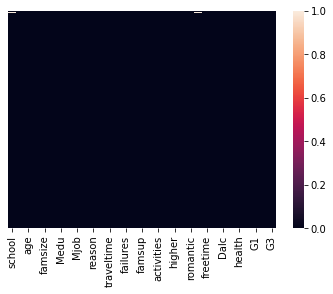

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

In [ ]:
#Replacing missing values
df.interpolate()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3,2,2,3,3,10,7,8,6
3,NaN,F,15,U,GT3,T,4,2,health,services,...,4.0,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5.0,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2.0,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5.0,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4.0,4,1,3,4,5,0,11,12,10


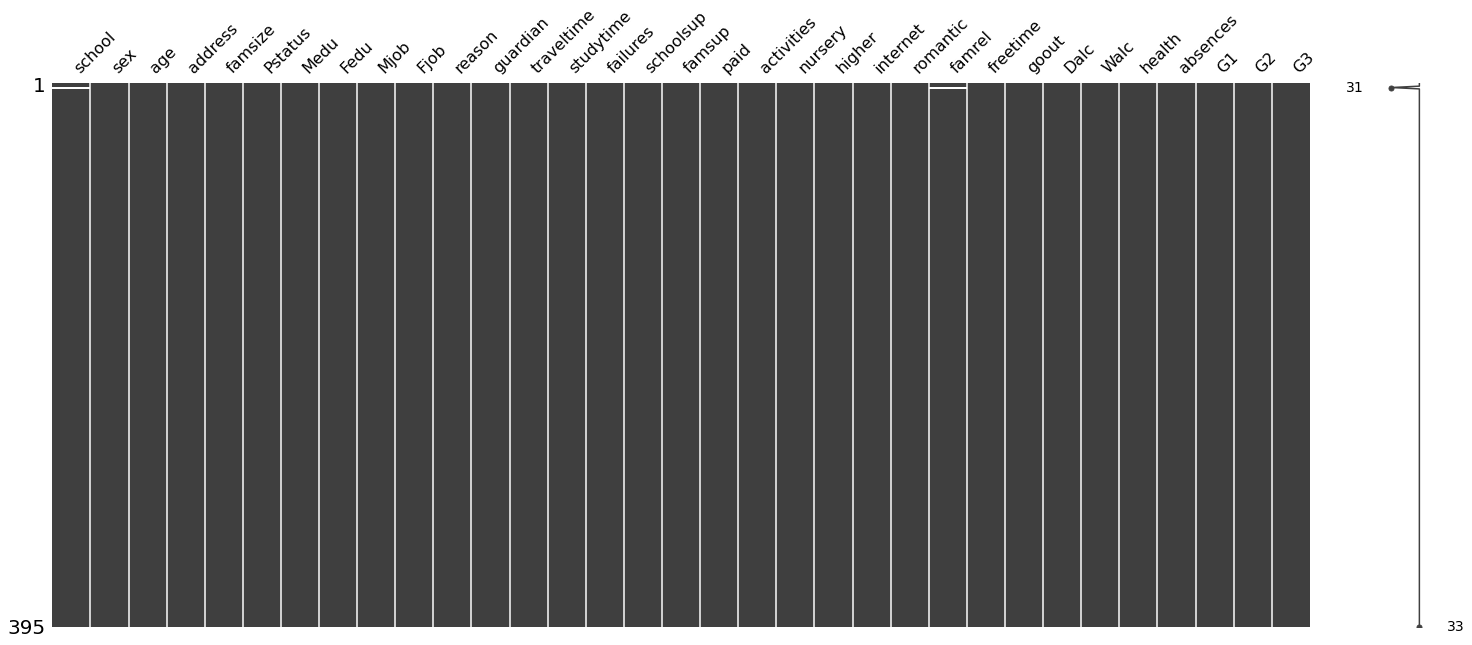

In [ ]:
#The data in a matrix form
mn.matrix(df)


In [ ]:
#Use .value_counts to inspect object data type
df.school.value_counts()

GP    348
MS     46
Name: school, dtype: int64

In [ ]:
df.school.str.slice(0,10)

0       GP
1       GP
2       GP
3      NaN
4       GP
      ... 
390     MS
391     MS
392     MS
393     MS
394     MS
Name: school, Length: 395, dtype: object

In [ ]:
df.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
dtype: object

In [ ]:
#View data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      394 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [ ]:
df.school.value_counts(dropna=False)

GP     348
MS      46
NaN      1
Name: school, dtype: int64

In [ ]:
df[df.Fjob.eq('teacher')]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3,4,1,1,3,6,5,6,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4.0,1,4,1,1,1,6,6,5,6
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4.0,4,5,5,5,5,16,10,12,11
37,GP,M,16,R,GT3,A,4,4,other,teacher,...,2.0,4,3,1,1,5,7,15,16,15
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,4.0,3,3,1,1,5,2,19,18,18
49,GP,F,15,U,GT3,T,4,4,services,teacher,...,4.0,4,4,1,1,3,2,7,7,7
60,GP,F,16,R,GT3,T,4,4,health,teacher,...,2.0,4,4,2,3,4,6,10,11,11
101,GP,M,16,U,GT3,T,4,4,services,teacher,...,4.0,4,3,1,1,4,0,16,17,17
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5.0,5,3,1,1,4,6,18,19,19
115,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,5.0,4,4,1,2,5,2,15,15,16


In [ ]:
#Establishing the data shape, Size and Summary
print("Number of Rows: {}\nNumber of Columns: {}".format(df.shape[0], df.shape[1]))
df.describe()

Number of Rows: 395
Number of Columns: 33


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,394.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.946701,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.405063
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896531,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.586780
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


DATA EXPLORATION 
Feature Selection

In [ ]:
# New Dataset with few selected columns
df2 = df[["G1", "G2", "G3", "failures", "studytime", "freetime", "absences", "internet"]].copy()
df2.head()


,G1,G2,G3,failures,studytime,freetime,absences,internet
0,5,6,6,0,2,3,6,no
1,5,5,6,0,2,3,4,yes
2,7,8,6,3,2,3,10,yes
3,15,14,15,0,3,2,2,yes
4,6,10,10,0,2,3,4,no


In [ ]:
#Summary of the selected dataset
df2.describe()

,G1,G2,G3,failures,studytime,freetime,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.405063,0.334177,2.035443,3.235443,5.708861
std,3.319195,3.761505,4.586780,0.743651,0.839240,0.998862,8.003096
min,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,8.000000,9.000000,8.000000,0.000000,1.000000,3.000000,0.000000
50%,11.000000,11.000000,11.000000,0.000000,2.000000,3.000000,4.000000
75%,13.000000,13.000000,14.000000,0.000000,2.000000,4.000000,8.000000
max,19.000000,19.000000,20.000000,3.000000,4.000000,5.000000,75.000000


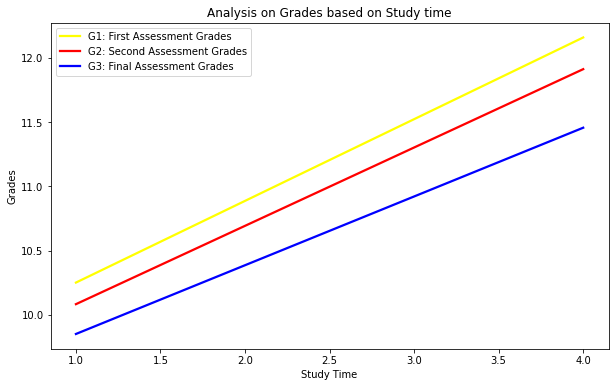

In [ ]:
#Establishing the relationship between grades and studytime
plt.figure(figsize=(10,6))
plt.title("Analysis on Grades based on Study time")
sns.regplot(x="studytime", y="G1", data=df2, color="yellow",label="G1: First Assessment Grades", 
            scatter= False, ci= None)
sns.regplot(x="studytime", y="G2", data=df2, color="red", label="G2: Second Assessment Grades",
           scatter= False, ci= None)
sns.regplot(x="studytime", y="G3", data=df2, color="blue", label="G3: Final Assessment Grades",
            scatter= False, ci= None)
plt.xlabel("Study Time")
plt.ylabel("Grades")
plt.legend(loc="upper left")
plt.show()

There is a strong positive relationship between studytime and grades. 

Machine Learning

In [ ]:
shuffled = df2.random_state=(0)
df3 = shuffled

In [ ]:
#Feature Selection (Chosing the predict variable and target variable)
# Predict variable (X) and target variable (Y)
X = df2["studytime"]
Y = df2["G3"]

In [ ]:
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

Training and Test Sets
> Training Set: Part of the data that will create and train the model 

> Test Set: Part of the data that will test the model, to know how good the model is

In [ ]:
# Apportioning the data into 2 sets: training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

Creating the model

In [ ]:
#The data is ready to create the model with the training data, make predictions and validate the model using the test data.
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1, 1), Y_train)

LinearRegression()

In [ ]:
#making prediction
predictions = lm.predict(X_test.values.reshape(-1, 1)) 
predictions[:7] # Sampling predictions

array([11.25091308, 11.25091308, 11.25091308, 10.45191137, 10.45191137,
       11.25091308, 10.45191137])

In [ ]:
#COmparison between Actual scores and predicted scores
lm_scores = pd.DataFrame({
    "Study_Time": X_test,
    "G3": Y_test,
    "Predicted_G3" : predictions
})
lm_scores.head()

,Study_Time,G3,Predicted_G3
329,3,14,11.250913
318,3,10,11.250913
317,3,9,11.250913
65,2,15,10.451911
59,2,16,10.451911


In [ ]:
#Validating the Model using R^2 (Coefficient of determination)
print("This model has an accuracy of: " + str(round(lm.score(X_test.values.reshape(-1,1), Y_test)*100,2)) + "%")

This model has an accuracy of: -3.68%


R^2 of 3.6% is poor, the accuracy of the model is not good enough.

**Multiple Linear Regression**


,G1,G2,G3,failures,studytime,freetime,absences
G1,1.000000,0.852118,0.803142,-0.354718,0.160612,0.012613,-0.031003
G2,0.852118,1.000000,0.905412,-0.355896,0.135880,-0.013777,-0.031777
G3,0.803142,0.905412,1.000000,-0.367930,0.097799,0.011816,0.033021
failures,-0.354718,-0.355896,-0.367930,1.000000,-0.173563,0.091987,0.063726
studytime,0.160612,0.135880,0.097799,-0.173563,1.000000,-0.143198,-0.062700
freetime,0.012613,-0.013777,0.011816,0.091987,-0.143198,1.000000,-0.058078
absences,-0.031003,-0.031777,0.033021,0.063726,-0.062700,-0.058078,1.000000


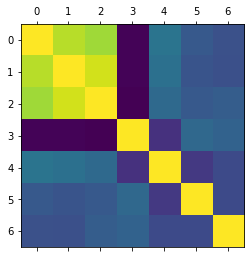

In [ ]:
#Correlation
plt.matshow(df2.corr())
df2.corr()

From the heatmap, its clear that increase in study time increase the final scores

**Calculating Limear Models** 

In [ ]:
# A Function to create  Linear Models with Scikit-Learn

def linear_model_creator(df,feature_variables, target_variable, test_size = 0.2):
    
    # Predict variable (X) and target variable (Y)
    X = np.array(df[feature_variables])
    Y = np.array(df[target_variable])

    # Dividing the data in training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 0)
        
    # Creating the Linear model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    # Creating predictions with the model
    predictions = lm.predict(X_test)

    # Creating the DF with the used features, the target variable and the predicted data
    dictionary = {}

    for feature in feature_variables:
        dictionary[feature] = X_test[:, feature_variables.index(feature)]

    lm_results = pd.DataFrame.from_dict(dictionary)
    lm_results["Y_target"] = Y_test
    lm_results["Y_predicted"] = predictions
    
    print("Target:",target_variable)
    print("Features:", feature_variables)
    print("The accuracy (R²) of the Model is:", lm.score(X_test, Y_test))
    print("The MAE of the Model is:", mean_absolute_error(Y_test, predictions))
    print("The intercept (alpha) is:", lm.intercept_)
    print("The coeficients (betas) are: ", lm.coef_)
    
    return lm_results.head()

In [ ]:
#Linear Model when using the most correlated variables with G3 that is: "G1", "G2" and "studytime"
linear_model_creator(df2, ["G1", "G2", "studytime"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime']
The accuracy (R²) of the Model is: 0.8057017585888324
The MAE of the Model is: 1.3164626866301503
The intercept (alpha) is: -1.3881632998592934
The coeficients (betas) are:  [ 0.10758998  1.01174586 -0.06280062]


,G1,G2,studytime,Y_target,Y_predicted
0,14,14,3,14,14.094137
1,11,11,3,10,10.736129
2,9,10,3,9,9.509203
3,16,15,2,15,15.383863
4,15,16,2,16,16.288019


The Model above performed much better when compared to the previouse model where only one feature was used.

In [ ]:
  # Linear Model performance with all the variables

linear_model_creator(df2, ["G1", "G2", "studytime","freetime","failures","absences"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'failures', 'absences']
The accuracy (R²) of the Model is: 0.8069098018885694
The MAE of the Model is: 1.3753839792440634
The intercept (alpha) is: -1.5168197948459685
The coeficients (betas) are:  [ 0.09275424  1.0050291  -0.04580728  0.05634118 -0.372173    0.04732425]


,G1,G2,studytime,freetime,failures,absences,Y_target,Y_predicted
0,14,14,3,3,0,4,14,14.073046
1,11,11,3,3,0,0,10,10.590399
2,9,10,3,3,0,9,9,9.825779
3,16,15,2,4,0,2,15,15.271083
4,15,16,2,2,0,2,16,16.070676


R² in this model has improved by ~0.0012

The Variable Failure has very low correlation with G3 and as such should be dropped. 

> Indented block


 

In [ ]:
#Linear Model performance with all the variables except failures
linear_model_creator(df2, ["G1", "G2", "studytime","freetime","absences"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'absences']
The accuracy (R²) of the Model is: 0.8066929189877992
The MAE of the Model is: 1.3744397866727562
The intercept (alpha) is: -1.895552452752094
The coeficients (betas) are:  [ 0.10806545  1.01464954 -0.02596365  0.04703447  0.04303058]


,G1,G2,studytime,freetime,absences,Y_target,Y_predicted
0,14,14,3,3,4,14,14.057792
1,11,11,3,3,0,10,10.517525
2,9,10,3,3,9,9,9.674020
3,16,15,2,4,2,15,15.275510
4,15,16,2,2,2,16,16.088025


The linear models performed much better to predict G3 than just using one variable "studytime".

The most accurate and with the least MAE is the model with variables: "G1", "G2", "studytime","freetime","absences" The differennces between them is however very negligible

**Impact on Studytime and Internet Access on Grades**

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


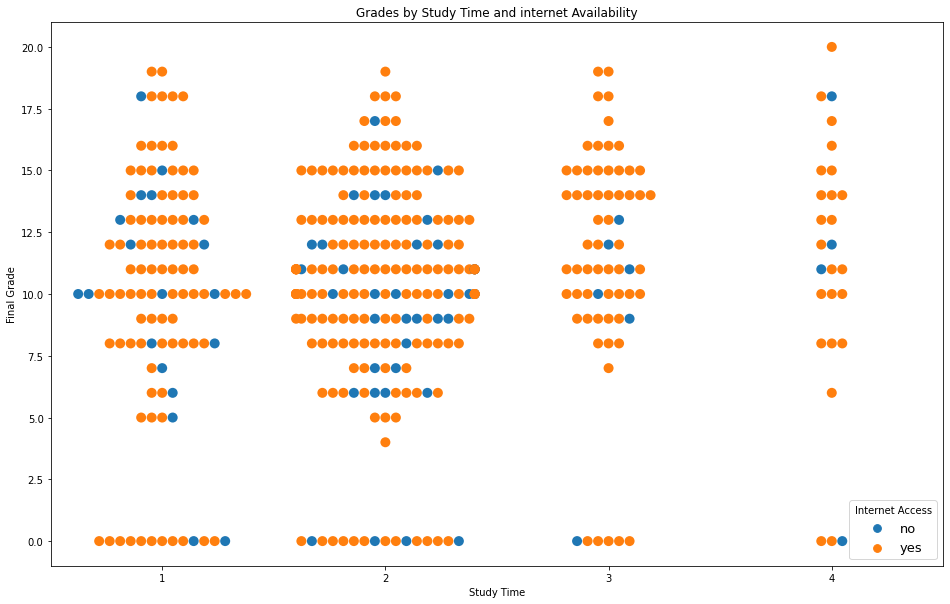

yes    329
no      66
Name: internet, dtype: int64

In [ ]:
#Examining how studytime and the final grades are related to internet access.

plt.figure(figsize=(16,10))
plt.title("Grades by Study Time and internet Availability")
sns.swarmplot(x="studytime", y="G3", hue="internet", data=df2, size=10)
plt.xlabel("Study Time")
plt.ylabel("Final Grade")

plt.legend(loc="lower right", title="Internet Access", prop={"size":13})
plt.show()

df2.internet.value_counts()

From the scatter plot above, children with internet access have a higher chance of scoring 12.5 and above with less studytime than their counterparts without interne access. 

In [ ]:
#Data Pre-Processing using dummy variables
dummy_internet = pd.get_dummies(df2["internet"], prefix = "Internet")
dummy_internet.head()

,Internet_no,Internet_yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
# Creating a dataframe with dummies inside
df3 = df2.join(dummy_internet)
column_names = df3.columns.values.tolist()
df3.head()

,G1,G2,G3,failures,studytime,freetime,absences,internet,Internet_no,Internet_yes
0,5,6,6,0,2,3,6,no,1,0
1,5,5,6,0,2,3,4,yes,0,1
2,7,8,6,3,2,3,10,yes,0,1
3,15,14,15,0,3,2,2,yes,0,1
4,6,10,10,0,2,3,4,no,1,0


Linear Models with the Dummies

In [ ]:
#Feature selection from the df3
feature_variables = df3.drop(["G3","internet","failures"], axis= 1).columns.values.tolist()
feature_variables

['G1',
 'G2',
 'studytime',
 'freetime',
 'absences',
 'Internet_no',
 'Internet_yes']

In [ ]:
#Model with the dummies
linear_model_creator(df3, feature_variables, "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'absences', 'Internet_no', 'Internet_yes']
The accuracy (R²) of the Model is: 0.8058385697780261
The MAE of the Model is: 1.3948224033428218
The intercept (alpha) is: -1.8775350865244533
The coeficients (betas) are:  [ 0.10413636  1.02171475 -0.02024715  0.05299483  0.04452264  0.13668109
 -0.13668109]


,G1,G2,studytime,freetime,absences,Internet_no,Internet_yes,Y_target,Y_predicted
0,14,14,3,3,4,0,1,14,14.024033
1,11,11,3,3,0,0,1,10,10.468389
2,9,10,3,3,9,0,1,9,9.639105
3,16,15,2,4,2,0,1,15,15.238217
4,15,16,2,2,2,0,1,16,16.049806


The project gave the following insights
1. There is a strong positive correlation between studytime and grades scored
2. Students with access to internet scorede better grades within a short studytime compared to their conterparts without internet access. Based on this insight, government can therefore invest on internet access to improve learning outcomes for most students. 
